### <font color='yellow'>ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА</font>

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

План исследования:
1) Загрузка и обработка данных
2) Визуальный анализ данных
3) Статистический анализ данных и ответ на бизнес-вопросы:
    1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
    5. Дополнительные исследования
4) Финальный вывод по исследованию

#### Содержание датасета:

<table>
<tr style="background-color: #305C23"><td>НАИМЕНОВАНИЕ СТОЛБЦА</td><td>ОПИСАНИЕ</td><tr>
<tr><td>work_yeara</td><td>Год, в котором была выплачена зарплата.</td><tr>
<tr><td>experience_level</td><td>Опыт работы на этой должности в течение года со следующими возможными значениями: </br>
- EN — Entry-level/Junior;</br>
- MI — Mid-level/Intermediate;</br>
- SE — Senior-level/Expert;</br>
- EX — Executive-level/Director.</td><tr>
<tr><td>employment_type</td><td>Тип трудоустройства для этой роли:</br>
PT — неполный рабочий день;</br>
FT — полный рабочий день;</br>
CT — контракт;</br>
FL — фриланс.</td><tr>
<tr><td>job_title</td><td>Роль, в которой соискатель работал в течение года.</td><tr>
<tr><td>salary</td><td>Общая выплаченная валовая сумма заработной платы.</td><tr>
<tr><td>salary_currency</td><td>Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.</td><tr>
<tr><td>salary_in_usd</td><td>Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).</td><tr>
<tr><td>employee_residence</td><td>Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.</td><tr>
<tr><td>remote_ratio</td><td>Общий объём работы, выполняемой удалённо. Возможные значения:</br>
0 — удалённой работы нет (менее 20 %);</br>
50 — частично удалённая работа;</br>
100 — полностью удалённая работа (более 80 %).</td><tr>
<tr><td>company_location</td><td>Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.</td><tr>
<tr><td>company_size</td><td>Среднее количество людей, работавших в компании в течение года:</br>
S — менее 50 сотрудников (небольшая компания);</br>
M — от 50 до 250 сотрудников (средняя компания);</br>
L — более 250 сотрудников (крупная компания).</td><tr>

</table>

#### <font color='yellow'>1. Загрузка и обработка данных</font>



In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import category_encoders as ce

from scipy import stats
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [184]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv', index_col='Unnamed: 0')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [51]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [186]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 42


In [187]:
# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Размер таблицы после удаления дубликатов: (565, 11)


In [188]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,5.650000e+02,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,359,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.000000,NaN,NaN


In [189]:
# проверяю основные характеристики признаков
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,5.650000e+02,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,359,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.000000,NaN,NaN


In [190]:
# проверяю наполнение признака job_title для определения варианта его категоризации
data['job_title'].value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [191]:
# распределим признак job_title на 4 категории: Data Scientist, Data Engineer, Data Analyst, Other
def ds_typification(title):
    title = set(title.split(' '))
     
    for i in title:
        if i in ('Scientist', 'Science'):
            return ('Data Scientist') 
        elif i in ('Engineer', 'Engineering', 'Architect', 'ETL'):
            return ('Data Engineer') 
        elif i in ('Analyst', 'Analytics'):
            return ('Data Analyst')
    
    return ('Other')
        
    
data['job_type'] = data['job_title'].apply(ds_typification)
data['job_type'].value_counts()
    

job_type
Data Engineer     230
Data Scientist    211
Data Analyst      112
Other              12
Name: count, dtype: int64

In [192]:
# Удаляю исходный признак job_title, а также salary и salary_currency, 
# т.к уже есть приведённый к одной валюте salary_in_usd  
data = data.drop(['job_title', 'salary', 'salary_currency'], axis=1)

In [225]:
# переведём признак удалённой работы в категориальный

data['remote_type']=data['remote_ratio'].apply(lambda x: 'Remote' if x == 100 else ('Partial' if x == 50 else 'Office'))
data = data.drop('remote_ratio', axis=1)

In [11]:
# проверим признак страны компании на возможность сокращения числа значений
data['company_location'].value_counts()


company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [18]:
# отберём топ 9 стран, остальные пометим как "прочее"
top9 = ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP']
data['cloc_top9'] = data['company_location'].apply(lambda x: x if x in top9 else 'other')
print(data['cloc_top9'].value_counts())

cloc_top9
US       318
other     77
GB        46
CA        28
DE        27
IN        24
FR        15
ES        14
GR        10
JP         6
Name: count, dtype: int64


In [21]:
# сделаем аналогичное кодирование для страны работника
data['emploc_top9'] = data['employee_residence'].apply(lambda x: x if x in top9 else 'other')
print(data['emploc_top9'].value_counts())

emploc_top9
US       295
other     94
GB        43
IN        30
CA        27
DE        24
FR        18
ES        15
GR        12
JP         7
Name: count, dtype: int64


In [32]:
# добавим признак того что страна компании не совпадает со страной проживания сотрудника
data['loc_diff'] = data.apply(lambda row: 0 if row['company_location'] == row['employee_residence'] else 1, axis=1)
data[data['loc_diff']==1].head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size,job_type,remote_type,cloc_top9,emploc_top9,loc_diff
17,2020,SE,FT,114047,PL,GB,S,Data Engineer,Remote,GB,other,1
19,2020,MI,FT,56000,PT,US,M,Data Engineer,Remote,US,other,1
32,2020,SE,FT,68428,GR,US,L,Data Scientist,Remote,US,GR,1
40,2020,MI,FT,45760,PH,US,S,Data Scientist,Remote,US,other,1
53,2020,EN,FT,54742,PK,DE,L,Data Engineer,Remote,DE,other,1


In [34]:
# удаляем исходные признаки
data = data.drop(['company_location', 'employee_residence'], axis=1)

In [40]:
data.to_csv('ds_salaries_1.csv', index=False) 

Лирическое отступление</br>
Поначалу, я увлеклась преобразованием признаков и закодировала двоичным кодированием employee_residence и  company_location, перевела категориальные признаки experience_level и company_size в порядковые, а также через OneHotEncoding тип трудоустройства и свой новый признак job_type... но вчиталась в критерии оценки, где описана дальнейшая работа с категориальными признаками - пришлось всё отменить :)

<b>Вывод:</b> 
1) перед началом проектирования признаков следует чётко понимать преследуемые цели;
2) в датасете не было пропусков, но встретились дубликаты; среди признаков были дублирующие друг друга; в результате было сокращено количество строк и столбцов;
3) выявлены категориальные признаки: тип трудоустройства (employment_type), тип должности (job_type), опыт (experience_level), , страна компании (company_location), размер компании (company_size);
4) Числовой признак: зарплата (salary_in_usd);
5) Порядковый признак: год (work_year);
6) признак объём удалённой работы (remote_ratio) переведён в категориальный (remote_type)
7) признаки страна сотрудника (employee_residence) и страна компании (company_location) преобразованы в топ-9 стран сотрудников (emploc_top9) и топ-9 стран компаний, а также добавлен признак разницы локаций проживания сотрудника и компаннии (loc_diff) на основе исходных признаков, исходные признаки удалены.

#### <font color='yellow'>2. Визуальный анализ данных</font>

Text(0.5, 1.0, 'Распределение зарплат для всех сотрудников')

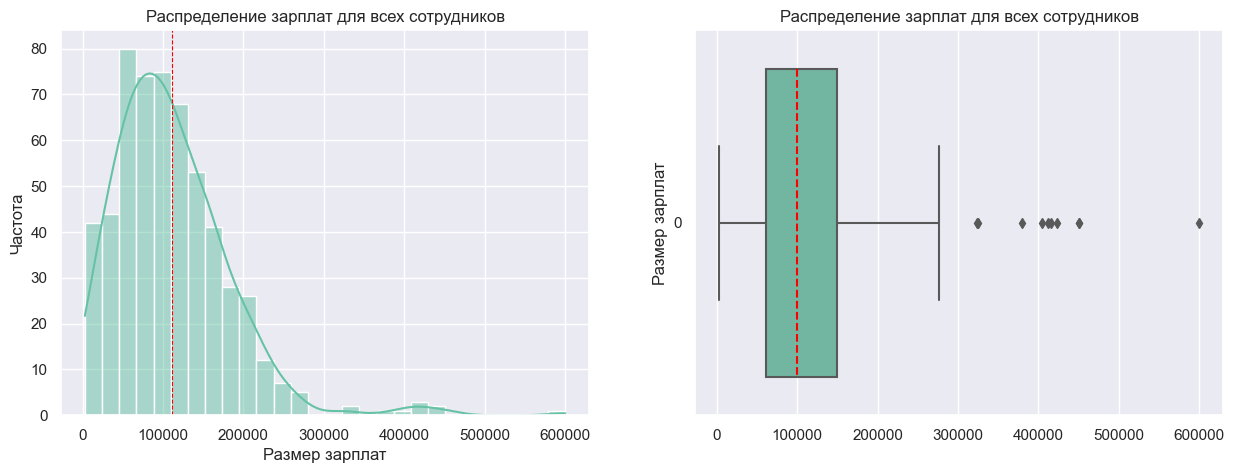

In [194]:
# Зарплаты без разделения на категории

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплат', ylabel='Частота')
axes[0].set_title('Распределение зарплат для всех сотрудников')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплат')
axes[1].set_title('Распределение зарплат для всех сотрудников')

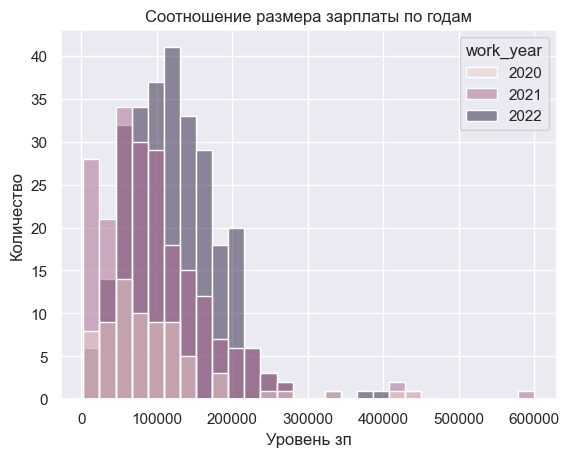

In [42]:
# визуализация соотношения размера зарплаты в зависимости от года
ax = sns.histplot(data=data, x="salary_in_usd", hue="work_year")
ax.set(xlabel='Уровень зп', ylabel='Количество')
#plt.legend(title='Год')
plt.title('Соотношение размера зарплаты по годам')
plt.show()

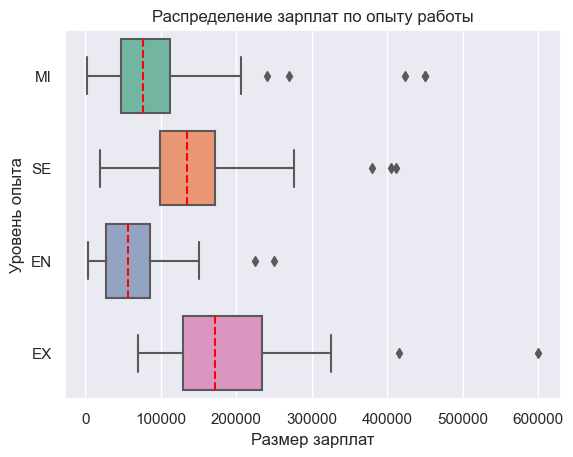

In [39]:
# зависимость размера зарплаты от опыта
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Уровень опыта')
plt.title('Распределение зарплат по опыту работы')
plt.show()


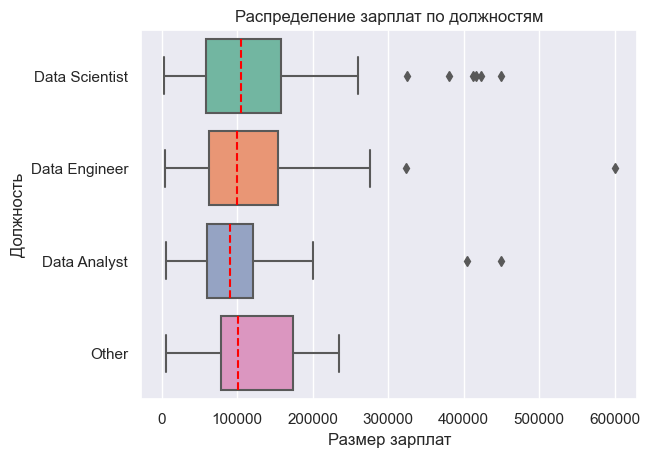

In [43]:
# зависимость размера зарплаты от должности
ax = sns.boxplot(data, x='salary_in_usd', y='job_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Должность')
plt.title('Распределение зарплат по должностям')
plt.show()

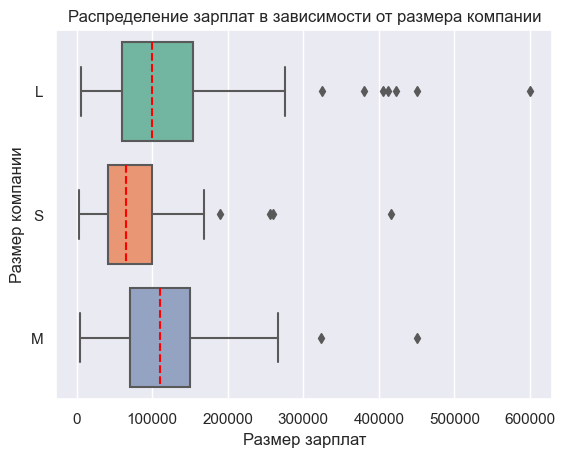

In [44]:
# зависимость размера зарплаты от размера компании
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Размер компании')
plt.title('Распределение зарплат в зависимости от размера компании')
plt.show()

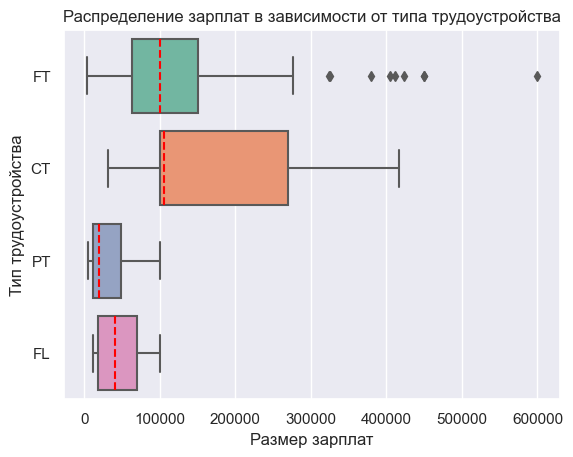

In [46]:
# зависимость размера зарплаты от типа трудоустройства
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Тип трудоустройства')
plt.title('Распределение зарплат в зависимости от типа трудоустройства')
plt.show()

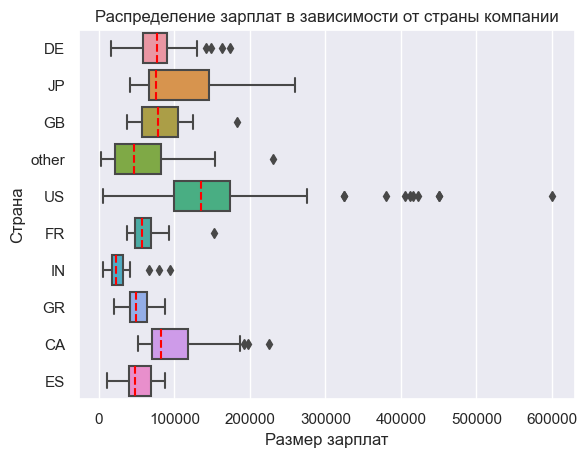

In [47]:
# зависимость размера зарплаты от страны компании
ax = sns.boxplot(data, x='salary_in_usd', y='cloc_top9', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Страна')
plt.title('Распределение зарплат в зависимости от страны компании')
plt.show()

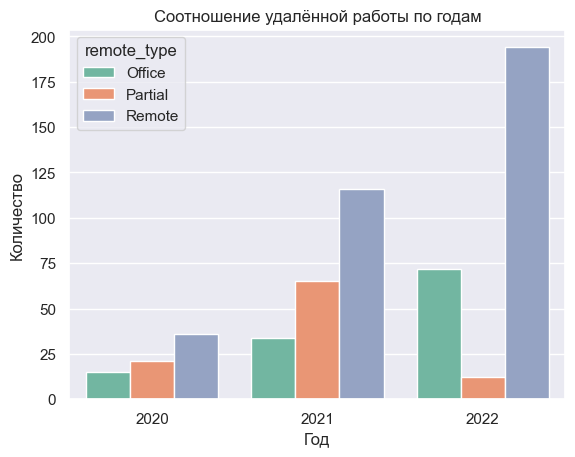

In [234]:
# изменение доли удалённой работы с течением времени
ax = sns.countplot(data=data, x=data['work_year'], hue='remote_type')
ax.set(xlabel='Год', ylabel='Количество')
plt.title('Соотношение удалённой работы по годам')
plt.show()

In [246]:
# соотношение между удалённостью работы и типом трудоустройства
table = pd.crosstab(data['remote_type'], data['employment_type'])
display(table)

employment_type,CT,FL,FT,PT
remote_type,,,,
Office,0,1,120,0
Partial,0,1,91,6
Remote,5,2,335,4


In [248]:
# соотношение между удалённостью работы и размером компании
table = pd.crosstab(data['remote_type'], data['company_size'])
display(table)

company_size,L,M,S
remote_type,,,
Office,31,75,15
Partial,59,21,18
Remote,103,194,49


In [37]:
# сколько сотрудников работают в компаниях из других стран (loc_diff = 1)
table = pd.crosstab(data['cloc_top9'], data['loc_diff'])
display(table)

loc_diff,0,1
cloc_top9,,
CA,26,2
DE,22,5
ES,13,1
FR,14,1
GB,42,4
GR,10,0
IN,24,0
JP,6,0
US,293,25


In [36]:
# страна компании vs страна проживания сотрудника
table = pd.crosstab(data['cloc_top9'], data['emploc_top9'])
display(table)

emploc_top9,CA,DE,ES,FR,GB,GR,IN,JP,US,other
cloc_top9,,,,,,,,,,
CA,26,0,0,0,1,0,0,0,1,0
DE,0,22,0,1,0,0,0,0,0,4
ES,0,0,13,1,0,0,0,0,0,0
FR,0,0,0,14,0,0,0,0,1,0
GB,0,0,0,0,42,0,0,0,0,4
GR,0,0,0,0,0,10,0,0,0,0
IN,0,0,0,0,0,0,24,0,0,0
JP,0,0,0,0,0,0,0,6,0,0
US,1,1,1,1,0,1,4,0,293,16


In [49]:
# страна компании vs страна проживания сотрудника
table = pd.crosstab(data['job_type'], data['company_size'])
display(table)

company_size,L,M,S
job_type,,,
Data Analyst,30,71,11
Data Engineer,71,125,34
Data Scientist,86,90,35
Other,6,4,2


<b>Вывод:</b> </br>
- наблюдается рост зарплат каждый последующий год (2020 - 2022), 
- повышается уровень зп при повышении уровня опыта, 
- распределение зп по должностям:
    - на должностях Data Scientist и Data Engineer размеры зарплат на похожих уровнях, 
    - у Data Analyst разброс вилок зп чуть ниже, 
    - на вакансиях, отнесённых к "прочим" уровень зп выше - возможно, в эту категорию попали руководящие должности, на которых уровень зп выше (проверим далее)
- в больших по размеру компаниях больший разброс уровней зарплат, также должность с максимальной зп находится в крупной компании
- частичная занятость и фриланс отличаются более низким окладом, полный рабочий день ожидаемо обладает уровнями зп на порядок выше, у контрактников ассиметрия в меньшую сторону зп, медиана примерно на уровне полного рабочего дня, хотя разброс уровней зарплат уходит в заметно большую сторону
- должностей Data Engineer больше, чем должностей других типов, в случае со среднего размера компаниями - заметно больше


In [ ]:
data = pd.read_csv('ds_salaries_1.csv')

#### <font color='yellow'>3. Статистический анализ данных и ответ на бизнес-вопросы</font>

In [50]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

##### <font color='yellow'> 3.1. Ежегодный рост зарплат</font>

Note: не ясно, считать ли сравниваемые группы связанными? ведь сотрудники, работавшие в 2020м году, наверное, не исчезли и продолжали работать и в 2021г и в 2022г и их данные повторно должны были попадать в выборку. Однако, в последующих годах могли появляться новые сотрудники, не работавшие в 2020м году. </br>Будем строить исследование признака на гипотезе, что группы независимы.

т.к. Задача проверить гипотезу о росте зарплат, то проведём 2 теста. Для обоих тестов нулевая и альтернативная гипотезы будут одинаковы, но проверим их на различных данных:
1) ($μ_1$) - размер зарплат за 2020 год,  ($μ_2$) - размер зарплат за 2021 год; 
2) ($μ_1$) - размер зарплат за 2021 год,  ($μ_2$) - размер зарплат за 2022 год. 


*Нулевая гипотеза* ($H_0$): размер зарплат ($μ_1$) больше или равен размеру зарплат ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$ 

*Альтернативная гипотеза* ($H_1$): размер зарплат ($μ_1$) меньше размера зарплат ($μ_2$).

$$ H_0 : μ_1 < μ_2$$ 


In [65]:
# задаём группы по годам
salary_2020 = data.loc[data['work_year']==2020, 'salary_in_usd']
salary_2021 = data.loc[data['work_year']==2021, 'salary_in_usd']
salary_2022 = data.loc[data['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('зарплаты в 2020 г.:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])
print()
print('зарплаты в 2021 г.:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])
print()
print('зарплаты в 2022 г.:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])


зарплаты в 2020 г.:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

зарплаты в 2021 г.:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

зарплаты в 2022 г.:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [63]:
# проводим тест по U-критерию Манна - Уитни, т.к. групп 2, они независимы 
# и распределение отлично от нормального

print('сравниваем зарплаты за 2020 и 2021 г.:')
_, p = stats.mannwhitneyu(salary_2020, salary_2021, alternative='less')
decision_hypothesis(p)

print()
print('сравниваем зарплаты за 2021 и 2022 г.:')
_, p = stats.mannwhitneyu(salary_2021, salary_2022, alternative='less')
decision_hypothesis(p)

сравниваем зарплаты за 2020 и 2021 г.:
p-value = 0.249
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

сравниваем зарплаты за 2021 и 2022 г.:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


<b>Вывод:</b> </br>
Нет оснований утверждать, что зарплаты в 2021 г. выше зарплат в 2020 г. Однако зарплаты в 2022 году выше зарплат в 2021 г. Таким образом, рост зарплат с 2020 до 2022 г. присутствует, но не ежегодный.

##### <font color='yellow'> 3.2. Зарплаты Data Scientist и Data Engineer</font>

*Нулевая гипотеза* ($H_0$): размер зарплат Data Scientist ($μ_1$) равен размеру зарплат Data Engineer ($μ_2$).

$$ H_0 : μ_1 = μ_2$$ 

*Альтернативная гипотеза* ($H_1$): размер зарплат Data Scientist ($μ_1$) отличается от размера зарплат Data Engineer ($μ_2$).

$$ H_0 : μ_1 \neq μ_2$$ 


In [66]:
# задаём группы по должностям
salary_DS = data.loc[data['job_type']=='Data Scientist', 'salary_in_usd']
salary_DE = data.loc[data['job_type']=='Data Engineer', 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('зарплаты Data Scientist:')
result = stats.shapiro(salary_DS)
decision_normality(result[1])
print()
print('зарплаты Data Engineer:')
result = stats.shapiro(salary_DE)
decision_normality(result[1])

зарплаты Data Scientist:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

зарплаты Data Engineer:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [68]:
# проводим тест по U-критерию Манна - Уитни, т.к. групп 2, они независимы 
# и распределение отлично от нормального

print('сравниваем зарплаты Data Scientist и Data Engineer:')
_, p = stats.mannwhitneyu(salary_DS, salary_DE, alternative='two-sided')
decision_hypothesis(p)

сравниваем зарплаты Data Scientist и Data Engineer:
p-value = 0.677
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


<b>Вывод:</b> </br>
Статистический тест подтверждает выводы визуального анализа: нет оснований утверждать, что зарплаты Data Scientist и Data Engineer различаются.

##### <font color='yellow'> 3.3. Зарплаты специалистов Data Scientist в компаниях различных размеров</font>

<b>Вывод:</b> </br>


##### <font color='yellow'> 3.4. Связь между наличием должностей Data Scientist и Data Engineer и размером компании</font>

<b>Вывод:</b> </br>


#### <font color='yellow'>4. Дополнительное исследование</font>

<b>Вывод:</b> </br>


#### <font color='yellow'>5. Финальный вывод по исследованию</font>

